In [1]:
# similarity within a cluster --> multiple alignment with 10 core genes; 10 accessaory genes
# need to parse each file
# input representing gene; cluster_detail
# aac for every representing gene, compare COG
# pseudoAAC for every representing gene
# 2-mer for every cluster
# 

In [1]:
import pandas as pd
cluster_detail = pd.read_pickle("/home/hermuba/data/genePredicted/cdhit/cluster_detail_df")

blast = pd.read_pickle("/home/hermuba/data/blast/blastp_gi_1022")
lactamase = blast.loc[blast['title'].str.contains('lactamase')]
efflux_pump = blast.loc[blast['title'].str.contains('efflux')]

cogq = cluster_detail.loc[cluster_detail['cog'] == 'Q']

In [8]:
cluster_detail.columns

Index(['representing gene length', 'representing gene header',
       'mean similarity', 'mean length', 'member', 'cog', 'card_portion',
       'card_count', 'aro_member', 'aro_member_identity', 'representing_aro',
       'representing_aro_identity', 'prevalance', 'best_aro_identity'],
      dtype='object')

In [3]:
p = "/home/hermuba/data/genePredicted/cdhit/cluster_seq/"
from Bio import AlignIO
alignment = AlignIO.read(p+"align_9.faa", "clustal")

In [4]:
print(alignment)

SingleLetterAlphabet() alignment with 47 rows and 3164 columns
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JMUY01000001_1232
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JAPE01000009_453
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JAPJ01000005_644
MDNLRFSSAPTADSIDASIVQHYPDCEPVAVIGYACHFPESPDG...TL* JMVB01000012_359
MDNLRFSSAPTADSIDASIVQHYPDCEPVAVIGYACHFPESPDG...TL* JMVF01000003_26
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JJMY01000013_69
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JMVW01000010_359
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JMVJ01000020_414
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JAPU01000002_504
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* JMUW01000003_663
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* MPCO01000001_2063
MDNLRFSSAPTADSIDASIVQHYPDCEPVAVIGYACHFPESPDG...TL* JJMX01000001_359
MDNLRFSSAPTADSIDASIAQHYPDCEPVAVIGYACHFPESPDG...TL* CP020116_1523
MDNLRFSSAPTADSIDASIVQHYPDCEPVAVIGYACHFPESPDG...TL* JMVS0

In [5]:
ref = pd.read_pickle("/home/hermuba/data/genePredicted/cdhit/ec0102_df")

In [4]:
from Bio import SeqIO
clus_9 = SeqIO.parse("/home/hermuba/data/genePredicted/cdhit/cluster_seq/Cluster 9.faa", "fasta")
intra_seq = [str(seq_record.seq) for seq_record in clus_9]
repr_seq = SeqIO.parse("/home/hermuba/data/genePredicted/cdhit/cdhit.faa", "fasta")
# rep: dictionary geneID: seqeunce record
rep = SeqIO.to_dict(repr_seq)
rand_seq = [str(seq_record.seq) for seq_record in rep.values()]

In [6]:
rand_seq[2]

'MMHLKNITAGNPKTKEQYQLTKQFNIKWLYSADGKNWYEEQKNFQPDTLKMVYDHNGVIICIEKDVSAINPEGASVVELPDITANRRADISGKWMFKDGVVVKRTYTEEEQRQQAENEKQSLLQLVRDKTQLWDSQLRLGIISDENKQKLTEWMLYAQKVESTDTSSLPVTFPEQPE*'

In [7]:
# a def input sequence list, return array of AAC for each sequence
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
def cal_comp(list_with_seq):
    a= []
    for seq in list_with_seq:
        analysed_seq = ProteinAnalysis(seq)
        port = analysed_seq.get_amino_acids_percent()
        a= a + list(port.values())
    col = int(len(a)/20)
    return(np.array(a).reshape(col,20))

In [21]:
# a: within one cluster
a = cal_comp(intra_seq)
# randomrep: randomly selected 100 representing genes
randomerep = cal_comp(rand_seq[:100]) # randomly selected representing genes
# b_lact:
b_lact = [str(rep[x].seq) for x in lactamase.index]
b = cal_comp(b_lact)
# all representing gene within COG Q
q = cal_comp([str(rep[x].seq) for x in cogq['representing gene header']])
# all efflux pump
pump = [str(rep[x].seq) for x in efflux_pump.index]
p = cal_comp(pump)
# Bcr family pump
Bcr_id = ['JMUY01000001_617|1438670.3', 'JMVT01000002_704|1438693.3', 'JMUY01000001_1467|1438670.3', 'JMUY01000001_863|1438670.3']
bcr = cal_comp([str(rep[x].seq) for x in Bcr_id])

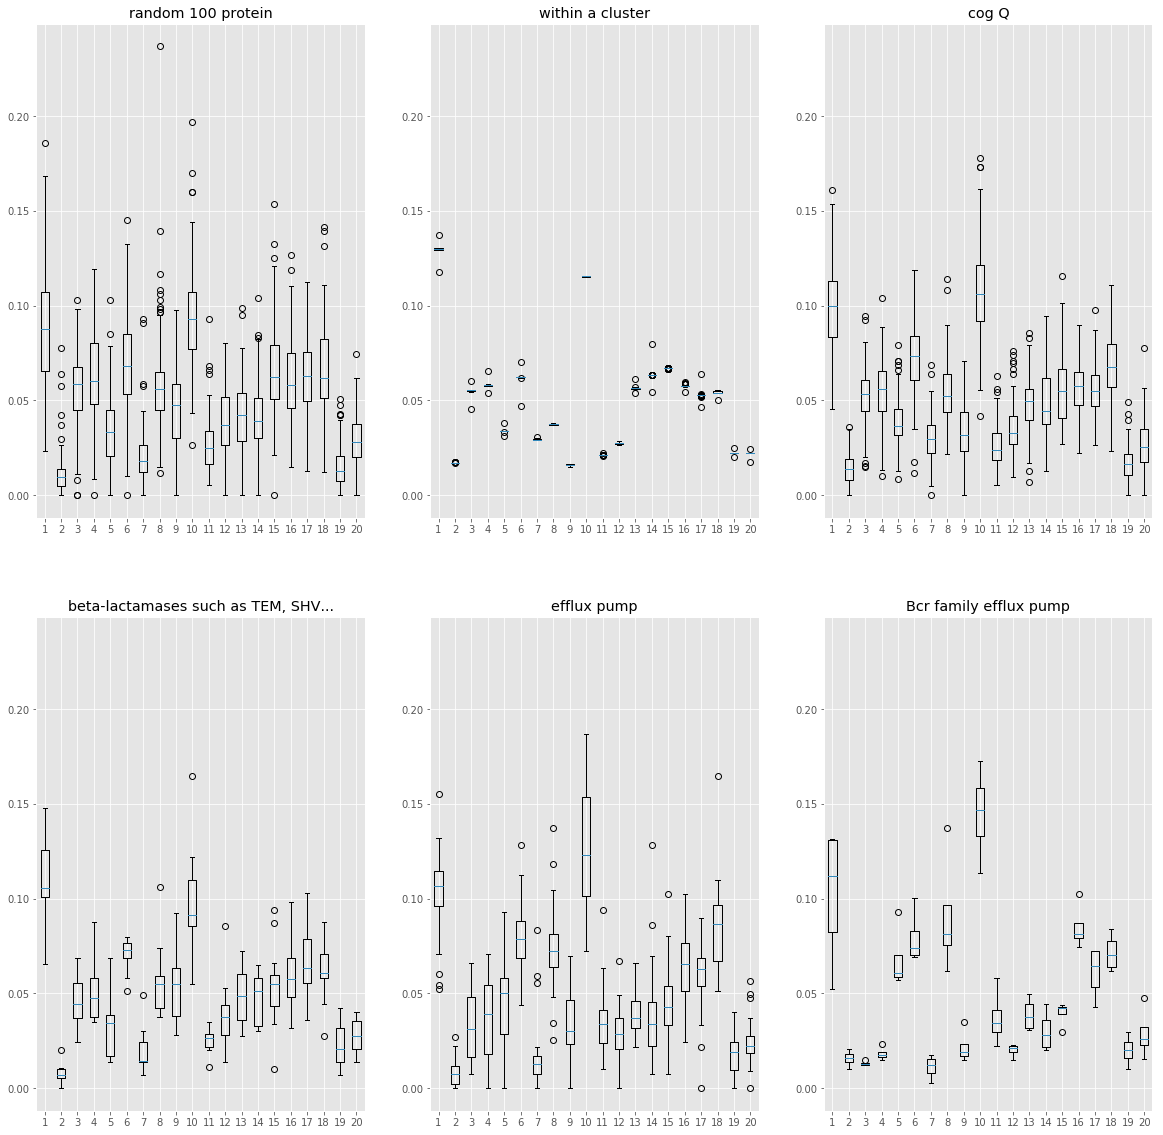

In [25]:
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(20,20))

ax = plt.subplot(231)
plt.title("random 100 protein")
plt.boxplot(randomerep)
plt.subplot(232, sharey = ax)
plt.title("within a cluster")
plt.boxplot(a)
plt.subplot(233, sharey = ax)
plt.title("cog Q")
plt.boxplot(q)
plt.subplot(234, sharey = ax)
plt.title("beta-lactamases such as TEM, SHV...")
plt.boxplot(b)

ax = plt.subplot(235, sharey =ax)
plt.title("efflux pump")
plt.boxplot(p)
ax = plt.subplot(236, sharey = ax)
plt.title("Bcr family efflux pump")
plt.boxplot(bcr)
plt.show()
